In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from nqs.state.utils import plot_style

DATA_PATH = "../data/fermion_dots"
FIG_PATH = "figs/fermion_dots"

<Figure size 1000x600 with 0 Axes>

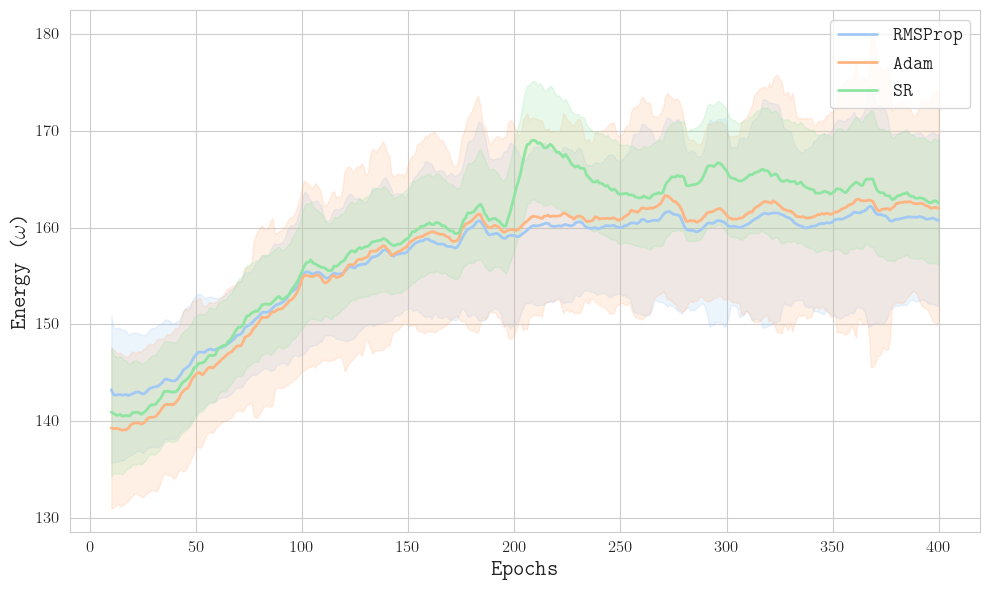

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = DATA_PATH + "/dsffn_aggregated_bayes_n20_opt.csv"
std_file_path = DATA_PATH + "/std_dsffn_aggregated_bayes_n20_opt.csv"


# Load the CSV files
data_file_path = '/mnt/data/dsffn_aggregated_bayes_n20_opt.csv'
std_file_path = '/mnt/data/std_dsffn_aggregated_bayes_n20_opt.csv'

rbm_data_file_path = DATA_PATH + "/rbm_aggregated_bayes_n20_opt.csv"
rbm_std_file_path = DATA_PATH + "/std_rbm_aggregated_bayes_n20_opt.csv"

data = pd.read_csv(data_file_path)
std_data = pd.read_csv(std_file_path)

rbm_data = pd.read_csv(rbm_data_file_path)
rbm_std_data = pd.read_csv(rbm_std_file_path)

# Convert all data to numeric values
data = data.apply(pd.to_numeric, errors='coerce')
std_data = std_data.apply(pd.to_numeric, errors='coerce')
rbm_data = rbm_data.apply(pd.to_numeric, errors='coerce')
rbm_std_data = rbm_std_data.apply(pd.to_numeric, errors='coerce')

# Extract the necessary data
steps = np.asarray(data['Step'])
energy_rmsprop = np.asarray(data['optimizer: rmsprop - energy'])
energy_adam = np.asarray(data['optimizer: adam - energy'])
energy_sr = np.asarray(data['optimizer: sr - energy'])

std_rmsprop = np.asarray(std_data['optimizer: rmsprop - std'])
std_adam = np.asarray(std_data['optimizer: adam - std'])
std_sr = np.asarray(std_data['optimizer: sr - std'])

# Extract the necessary data for RBM
rbm_steps = np.asarray(rbm_data['Step'])
rbm_energy_sr = np.asarray(rbm_data['optimizer: sr - energy'])
rbm_std_sr = np.asarray(rbm_std_data['optimizer: sr - std'])

rbm_energy_adam = np.asarray(rbm_data['optimizer: adam - energy'])
rbm_std_adam = np.asarray(rbm_std_data['optimizer: adam - std'])

rbm_energy_rmsprop = np.asarray(rbm_data['optimizer: rmsprop - energy'])
rbm_std_rmsprop = np.asarray(rbm_std_data['optimizer: rmsprop - std'])

# Ensure all values are finite
steps = np.where(np.isfinite(steps), steps, np.nan)
energy_rmsprop = np.where(np.isfinite(energy_rmsprop), energy_rmsprop, np.nan)
std_rmsprop = np.where(np.isfinite(std_rmsprop), std_rmsprop, np.nan)

energy_adam = np.where(np.isfinite(energy_adam), energy_adam, np.nan)
std_adam = np.where(np.isfinite(std_adam), std_adam, np.nan)

energy_sr = np.where(np.isfinite(energy_sr), energy_sr, np.nan)
std_sr = np.where(np.isfinite(std_sr), std_sr, np.nan)

# Ensure all values are finite for RBM
rbm_steps = np.where(np.isfinite(rbm_steps), rbm_steps, np.nan)
rbm_energy_sr = np.where(np.isfinite(rbm_energy_sr), rbm_energy_sr, np.nan)
rbm_std_sr = np.where(np.isfinite(rbm_std_sr), rbm_std_sr, np.nan)

rbm_energy_adam = np.where(np.isfinite(rbm_energy_adam), rbm_energy_adam, np.nan)
rbm_std_adam = np.where(np.isfinite(rbm_std_adam), rbm_std_adam, np.nan)

rbm_energy_rmsprop = np.where(np.isfinite(rbm_energy_rmsprop), rbm_energy_rmsprop, np.nan)
rbm_std_rmsprop = np.where(np.isfinite(rbm_std_rmsprop), rbm_std_rmsprop, np.nan)

# Calculate the rolling average over 10 epochs
rolling_window = 10

rolling_rmsprop = pd.Series(energy_rmsprop).rolling(window=rolling_window).mean()
rolling_rmsprop_std = pd.Series(std_rmsprop).rolling(window=rolling_window).mean()

rolling_adam = pd.Series(energy_adam).rolling(window=rolling_window).mean()
rolling_adam_std = pd.Series(std_adam).rolling(window=rolling_window).mean()

rolling_sr = pd.Series(energy_sr).rolling(window=rolling_window).mean()
rolling_sr_std = pd.Series(std_sr).rolling(window=rolling_window).mean()

# Calculate the rolling average and standard deviation for RBM
rolling_rbm_sr = pd.Series(rbm_energy_sr).rolling(window=rolling_window).mean()
rolling_rbm_sr_std = pd.Series(rbm_std_sr).rolling(window=rolling_window).mean()

rolling_rbm_adam = pd.Series(rbm_energy_adam).rolling(window=rolling_window).mean()
rolling_rbm_adam_std = pd.Series(rbm_std_adam).rolling(window=rolling_window).mean()

rolling_rbm_rmsprop = pd.Series(rbm_energy_rmsprop).rolling(window=rolling_window).mean()
rolling_rbm_rmsprop_std = pd.Series(rbm_std_rmsprop).rolling(window=rolling_window).mean()

# Set the seaborn style to use the pastel palette
sns.set_palette("pastel")

# Define the colors based on the seaborn pastel palette
colors = sns.color_palette("pastel")

# Plotting the data with fill between error bars using rolling average and standard deviation
plt.figure(figsize=(18, 8))

# First plot
plt.subplot(1, 2, 1)
plt.plot(steps, rolling_rmsprop, label='RMSProp', color=colors[0])
plt.fill_between(steps, rolling_rmsprop - rolling_rmsprop_std, rolling_rmsprop + rolling_rmsprop_std, color=colors[0], alpha=0.2)

plt.plot(steps, rolling_adam, label='Adam', color=colors[1])
plt.fill_between(steps, rolling_adam - rolling_adam_std, rolling_adam + rolling_adam_std, color=colors[1], alpha=0.2)

plt.plot(steps, rolling_sr, label='SR', color=colors[2])
plt.fill_between(steps, rolling_sr - rolling_sr_std, rolling_sr + rolling_sr_std, color=colors[2], alpha=0.2)

plt.axhline(y=158.004, color='r', linestyle='--', label='HF')
plt.axhline(y=155.8822, color='b', linestyle='--', label='DMC')

plt.xlabel('Epochs')
plt.ylabel('Energy ($\omega$)')
plt.legend()

# Second plot for RBM data
plt.subplot(1, 2, 2)
plt.plot(rbm_steps, rolling_rbm_rmsprop, label='RMSProp (RBM)', color=colors[0])
plt.fill_between(rbm_steps, rolling_rbm_rmsprop - rolling_rbm_rmsprop_std, rolling_rbm_rmsprop + rolling_rbm_rmsprop_std, color=colors[0], alpha=0.2)

plt.plot(rbm_steps, rolling_rbm_adam, label='Adam (RBM)', color=colors[1])
plt.fill_between(rbm_steps, rolling_rbm_adam - rolling_rbm_adam_std, rolling_rbm_adam + rolling_rbm_adam_std, color=colors[1], alpha=0.2)

plt.plot(rbm_steps, rolling_rbm_sr, label='SR (RBM)', color=colors[2])
plt.fill_between(rbm_steps, rolling_rbm_sr - rolling_rbm_sr_std, rolling_rbm_sr + rolling_rbm_sr_std, color=colors[2], alpha=0.2)

plt.axhline(y=158.004, color='r', linestyle='--', label='HF')
plt.axhline(y=155.8822, color='b', linestyle='--', label='DMC')

plt.xlabel('Epochs')
plt.ylabel('Energy ($\omega$)')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_dots/correlation_factorsN_n12.pdf


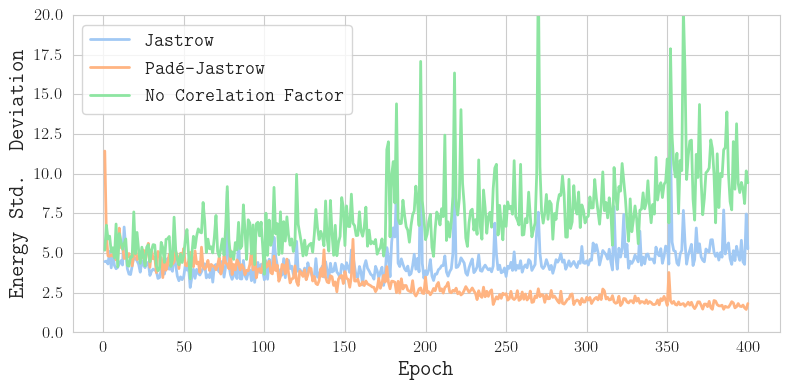

In [18]:
import matplotlib.pyplot as plt

# Load the CSV files
file_path = '/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/std_aggregate_12.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv(file_path)

# Convert all relevant columns to numeric
columns_to_convert = [
    'Step', 'correlation: j - std', 'correlation: j - std__MIN', 'correlation: j - std__MAX',
    'correlation: pj - std', 'correlation: pj - std__MIN', 'correlation: pj - std__MAX',
    'correlation: none - std', 'correlation: none - std__MIN', 'correlation: none - std__MAX'
]

data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Extracting the columns for plotting
steps = np.array(data['Step'], dtype=float)
correlation_j_std = np.array(data['correlation: j - std'], dtype=float)
correlation_j_std_min = np.array(data['correlation: j - std__MIN'], dtype=float)
correlation_j_std_max = np.array(data['correlation: j - std__MAX'], dtype=float)
correlation_pj_std = np.array(data['correlation: pj - std'], dtype=float)
correlation_pj_std_min = np.array(data['correlation: pj - std__MIN'], dtype=float)
correlation_pj_std_max = np.array(data['correlation: pj - std__MAX'], dtype=float)
correlation_none_std = np.array(data['correlation: none - std'], dtype=float)
correlation_none_std_min = np.array(data['correlation: none - std__MIN'], dtype=float)
correlation_none_std_max = np.array(data['correlation: none - std__MAX'], dtype=float)

# Create a plot without texture and with fill between regions for the entire dataset
plt.figure(figsize=(8, 4))

# Plot the data
plt.plot(steps, correlation_j_std, label='Jastrow')
plt.plot(steps, correlation_pj_std, label='Padé-Jastrow')
plt.plot(steps, correlation_none_std, label='No Corelation Factor')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Energy Std. Deviation')
plt.legend()
plt.grid(True)
#set y limits
plt.ylim(0, 20)
plot_style.save("fermion_dots/correlation_factorsN_n12")

# Show the plot



Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_dots/n2_energy.pdf
Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_dots/n2_std.pdf


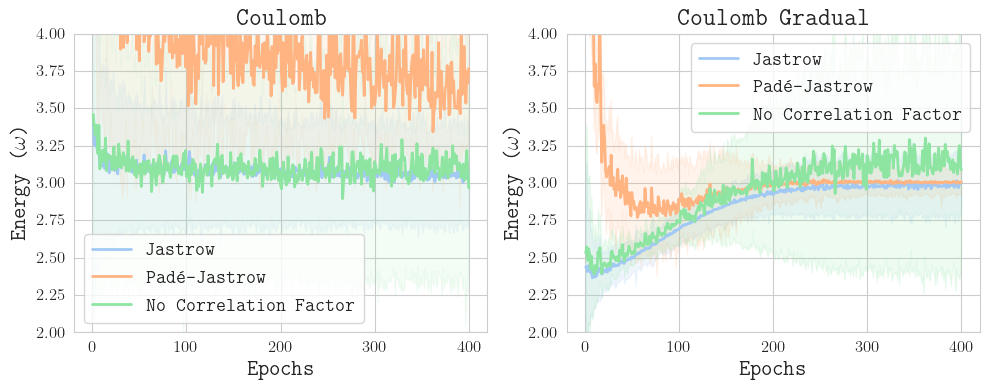

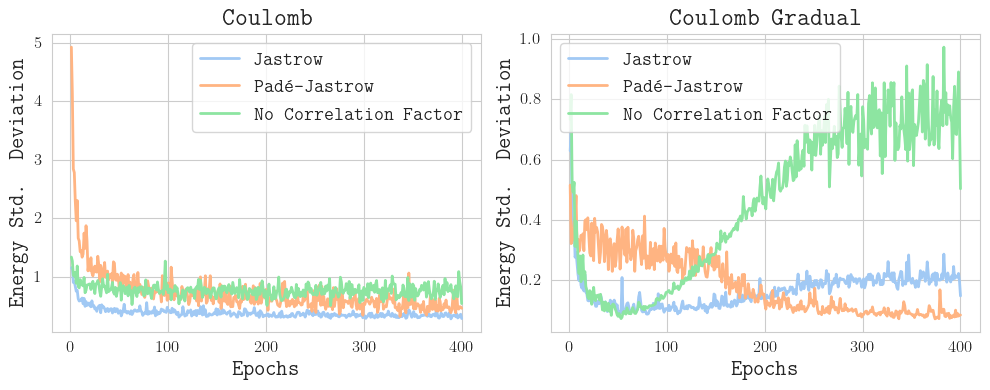

In [61]:
# Plotting both correlation std and energy side by side
# Load the new energy data files

# get seaborn color palette
colors = sns.color_palette("pastel")



energy_coulomb = pd.read_csv('/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/energy_coulomb.csv')
energy_coulomb_gradual = pd.read_csv('/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/energy_coulomb_gradual.csv')

std_coulomb = pd.read_csv('/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/std_coulomb.csv')
std_coulomb_gradual = pd.read_csv('/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/std_coulomb_gradual.csv')

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# drop columns that contain min or max in the name
energy_coulomb = energy_coulomb.loc[:, ~energy_coulomb.columns.str.contains('MIN')]
energy_coulomb = energy_coulomb.loc[:, ~energy_coulomb.columns.str.contains('MAX')]
energy_coulomb_gradual = energy_coulomb_gradual.loc[:, ~energy_coulomb_gradual.columns.str.contains('MIN')]
energy_coulomb_gradual = energy_coulomb_gradual.loc[:, ~energy_coulomb_gradual.columns.str.contains('MAX')]

std_coulomb = std_coulomb.loc[:, ~std_coulomb.columns.str.contains('MIN')]
std_coulomb = std_coulomb.loc[:, ~std_coulomb.columns.str.contains('MAX')]
std_coulomb_gradual = std_coulomb_gradual.loc[:, ~std_coulomb_gradual.columns.str.contains('MIN')]
std_coulomb_gradual = std_coulomb_gradual.loc[:, ~std_coulomb_gradual.columns.str.contains('MAX')]

# Convert all data to numeric values
energy_coulomb = energy_coulomb.apply(pd.to_numeric, errors='coerce')
energy_coulomb_gradual = energy_coulomb_gradual.apply(pd.to_numeric, errors='coerce')
std_coulomb = std_coulomb.apply(pd.to_numeric, errors='coerce')
std_coulomb_gradual = std_coulomb_gradual.apply(pd.to_numeric, errors='coerce')

# change the column names: correlation: none - energy to No Correlation Factor, correlation: j - energy to Jastrow, correlation: pj - energy to Padé-Jastrow
energy_coulomb.columns = energy_coulomb.columns.str.replace('correlation: none - energy', 'No Correlation Factor')
energy_coulomb.columns = energy_coulomb.columns.str.replace('correlation: j - energy', 'Jastrow')
energy_coulomb.columns = energy_coulomb.columns.str.replace('correlation: pj - energy', 'Padé-Jastrow')

energy_coulomb_gradual.columns = energy_coulomb_gradual.columns.str.replace('correlation: none - energy', 'No Correlation Factor')
energy_coulomb_gradual.columns = energy_coulomb_gradual.columns.str.replace('correlation: j - energy', 'Jastrow')
energy_coulomb_gradual.columns = energy_coulomb_gradual.columns.str.replace('correlation: pj - energy', 'Padé-Jastrow')

# Extract the necessary data
steps = np.asarray(energy_coulomb['Step'])
energy_coulomb_j = np.asarray(energy_coulomb['Jastrow'])
energy_coulomb_pj = np.asarray(energy_coulomb['Padé-Jastrow'])
energy_coulomb_none = np.asarray(energy_coulomb['No Correlation Factor'])

energy_coulomb_gradual_j = np.asarray(energy_coulomb_gradual['Jastrow'])
energy_coulomb_gradual_pj = np.asarray(energy_coulomb_gradual['Padé-Jastrow'])
energy_coulomb_gradual_none = np.asarray(energy_coulomb_gradual['No Correlation Factor'])

# # now change names for std
std_coulomb.columns = std_coulomb.columns.str.replace('correlation: none - std', 'No Correlation Factor')
std_coulomb.columns = std_coulomb.columns.str.replace('correlation: j - std', 'Jastrow')
std_coulomb.columns = std_coulomb.columns.str.replace('correlation: pj - std', 'Padé-Jastrow')

std_coulomb_gradual.columns = std_coulomb_gradual.columns.str.replace('correlation: none - std', 'No Correlation Factor')
std_coulomb_gradual.columns = std_coulomb_gradual.columns.str.replace('correlation: j - std', 'Jastrow')
std_coulomb_gradual.columns = std_coulomb_gradual.columns.str.replace('correlation: pj - std', 'Padé-Jastrow')

# Extract the necessary data
std_coulomb_j = np.asarray(std_coulomb['Jastrow'])
std_coulomb_pj = np.asarray(std_coulomb['Padé-Jastrow'])
std_coulomb_none = np.asarray(std_coulomb['No Correlation Factor'])

std_coulomb_gradual_j = np.asarray(std_coulomb_gradual['Jastrow'])
std_coulomb_gradual_pj = np.asarray(std_coulomb_gradual['Padé-Jastrow'])
std_coulomb_gradual_none = np.asarray(std_coulomb_gradual['No Correlation Factor'])


# plot energy
# extract 10 epoch rolling average

axs[0].plot(steps, energy_coulomb_j, label='Jastrow')
axs[0].plot(steps, energy_coulomb_pj, label='Padé-Jastrow')
axs[0].plot(steps, energy_coulomb_none, label='No Correlation Factor')
axs[0].set_title('Coulomb')
axs[0].set_xlabel('Epochs')
#set y limits
axs[0].set_ylim(2, 4)
# log scale
#axs[0].set_yscale('log')
axs[0].set_ylabel('Energy ($\omega$)')
axs[0].legend()

axs[0].fill_between(steps, energy_coulomb_j - std_coulomb_j, energy_coulomb_j + std_coulomb_j, color=sns.color_palette("pastel")[0], alpha=0.1)
axs[0].fill_between(steps, energy_coulomb_pj - std_coulomb_pj, energy_coulomb_pj + std_coulomb_pj, color=sns.color_palette("pastel")[1], alpha=0.1)
axs[0].fill_between(steps, energy_coulomb_none - std_coulomb_none, energy_coulomb_none + std_coulomb_none, color=sns.color_palette("pastel")[2], alpha=0.1)

# now coulomb gradual
axs[1].plot(steps, energy_coulomb_gradual_j, label='Jastrow')
axs[1].plot(steps, energy_coulomb_gradual_pj, label='Padé-Jastrow')
axs[1].plot(steps, energy_coulomb_gradual_none, label='No Correlation Factor')
#title
axs[1].set_title('Coulomb Gradual')
axs[1].set_xlabel('Epochs')
# log scale
#axs[1].set_yscale('log')
axs[1].set_ylabel('Energy ($\omega$)')
axs[1].legend()
axs[1].set_ylim(2, 4)

axs[1].fill_between(steps, energy_coulomb_gradual_j - std_coulomb_gradual_j, energy_coulomb_gradual_j + std_coulomb_gradual_j, color=sns.color_palette("pastel")[0], alpha=0.15)
axs[1].fill_between(steps, energy_coulomb_gradual_pj - std_coulomb_gradual_pj, energy_coulomb_gradual_pj + std_coulomb_gradual_pj, color=sns.color_palette("pastel")[1], alpha=0.15)
axs[1].fill_between(steps, energy_coulomb_gradual_none - std_coulomb_gradual_none, energy_coulomb_gradual_none + std_coulomb_gradual_none, color=sns.color_palette("pastel")[2], alpha=0.15)

# title 

plt.tight_layout()
plot_style.save("fermion_dots/n2_energy")


# now to the same plots for the std
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# plot energy
# extract 10 epoch rolling average

axs[0].plot(steps, std_coulomb_j, label='Jastrow')
axs[0].plot(steps, std_coulomb_pj, label='Padé-Jastrow')
axs[0].plot(steps, std_coulomb_none, label='No Correlation Factor')

axs[0].set_title('Coulomb')

axs[0].set_xlabel('Epochs')
# log scale
#axs[0].set_yscale('log')

axs[0].set_ylabel('Energy Std. Deviation')
axs[0].legend()

# now coulomb gradual
axs[1].plot(steps, std_coulomb_gradual_j, label='Jastrow')
axs[1].plot(steps, std_coulomb_gradual_pj, label='Padé-Jastrow')
axs[1].plot(steps, std_coulomb_gradual_none, label='No Correlation Factor')
#title
axs[1].set_title('Coulomb Gradual')

axs[1].set_xlabel('Epochs')

# log scale
#axs[1].set_yscale('log')
axs[1].set_ylabel('Energy Std. Deviation')
axs[1].legend()

# title

plt.tight_layout()
plot_style.save("fermion_dots/n2_std")



# change the column names